# Aug 21
I think I have an ok results set here.
I filled some blanks wrt dispensing methods manually, 
but otherwise this dataset was from a successful analysis 
where after some points were excluded the results looked good.

The OK column was set based mostly on the signal quality rather than
expected outcome for a compound.

In [109]:
import os
import re
import json
import os.path as osp
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import utils

db_dir = osp.abspath(osp.join('..', 'db-checkpoints'))
assert osp.exists(db_dir)
path = osp.join(db_dir, 'db-2024-08-21:21:18.sqlite3')
assert osp.exists(path)

experiment_query = '''SELECT r.experiment_number,
       r.dispense_bulk,
       r.dispense_ligands,
       r.well_volume,
       r.protein_concentration,
       r.protein_days_thawed,
       r.ligand,
       count(r.id) as result_count,
       sum(cast(r.ok as int)) ok_count,
       round((sum(cast(r.ok as float)) / count(r.ok)) * 100, 2) as ok_percent
   FROM results r
    LEFT JOIN result_comments rc 
    ON r.id = rc.result_id
   GROUP BY 
       dispense_bulk,
       dispense_ligands,
       well_volume,
       protein_concentration,
       protein_days_thawed,
       ligand
    ORDER BY experiment_number
'''

with sqlite3.connect(path) as con:
    df_experiments = pd.read_sql(experiment_query, con)

df_experiments

,experiment_number,dispense_bulk,dispense_ligands,well_volume,protein_concentration,protein_days_thawed,ligand,result_count,ok_count,ok_percent
0,3,Manual,Serial dilution,50.0,NaN,0,None,5,5,100.00
1,3,Manual,Serial dilution,50.0,NaN,0,4-Phenylimidazole,7,6,85.71
2,3,Manual,Serial dilution,50.0,NaN,0,Arachadionic acid,2,2,100.00
3,3,Manual,Serial dilution,50.0,NaN,0,Buffer Only,2,0,0.00
4,3,Manual,Serial dilution,50.0,NaN,0,Lauric acid,2,2,100.00
...,...,...,...,...,...,...,...,...,...,...
119,22,None,Serial dilution,40.0,10.0,0,Palmitic acid,1,0,0.00
120,22,None,Serial dilution,40.0,15.0,0,4-Phenylimidazole,1,1,100.00
121,22,None,Serial dilution,40.0,15.0,0,Aracadionic acid,1,1,100.00
122,22,None,Serial dilution,40.0,15.0,0,Lauric acid,1,1,100.00


# will need to fill these

In [6]:

with sqlite3.connect(path) as con:
    df = pd.read_sql("""select * from results""", con)

df.isna().sum()

id                         0
experiment_number          0
centrifuge_minutes       237
centrifuge_rpm           237
dispense_bulk             24
volume                     0
protein_name             938
dispense_ligands          80
protein_days_thawed       19
well_volume                0
ligand                    27
protein_concentration    145
plate_type                24
k                        426
km                         0
vmax                       0
rsq                        0
a420_max                   0
auc_mean                   0
auc_cv                     0
std_405                    0
dd_soret                   0
fig                        0
visited                    0
ok                         0
dtype: int64

In [35]:
 with sqlite3.connect(path) as con:
     df_result_count = pd.read_sql("""SELECT distinct experiment_number,
                                 count(experiment_number) AS num_results
                                 FROM results
                                     GROUP BY experiment_number
                                     ORDER BY experiment_number
                                 """,
                                  con)

df_result_count

,experiment_number,num_results
0,3,31
1,4,7
2,5,19
3,6,19
4,7,95
5,8,57
6,9,9
7,11,24
8,12,16
9,13,33


In [31]:
 with sqlite3.connect(path) as con:
     cur = con.execute("""SELECT case ok
                                    when 1 then 'ok'
                                    when 0 then 'fail'
                                end as ok,
                            count(ok) as count
                                FROM results
                                GROUP BY ok """)
     ok_count = dict(cur.fetchall())
     print(ok_count)

{'fail': 223, 'ok': 715}


In [33]:
715/938

0.7622601279317697

In [41]:
len(df_experiments.dropna()),  len(df_experiments)

(59, 124)

In [44]:
df_experiments.query('dispense_ligands.isna()')

,experiment_number,dispense_bulk,dispense_ligands,well_volume,protein_concentration,protein_days_thawed,ligand,result_count,ok_count,ok_percent
74,18,Manual,None,20.000000,10.000000,0,Arachadionic Acid,8,6,75.00
75,18,Manual,None,20.000000,13.636364,0,Arachadionic Acid,8,7,87.50
76,18,Manual,None,20.000000,20.000000,0,Arachadionic Acid,16,13,81.25
77,18,Manual,None,23.636364,10.000000,0,Arachadionic Acid,8,2,25.00
78,18,Manual,None,25.454545,14.545455,0,Arachadionic Acid,8,2,25.00
79,18,Manual,None,26.363636,20.000000,0,Arachadionic Acid,8,0,0.00
80,18,Manual,None,30.000000,10.000000,0,Arachadionic Acid,8,4,50.00
81,18,Manual,None,30.000000,16.363636,0,Arachadionic Acid,8,3,37.50
82,18,Manual,None,30.000000,20.000000,0,Arachadionic Acid,8,2,25.00


In [47]:
df.describe()

,id,experiment_number,centrifuge_minutes,centrifuge_rpm,volume,well_volume,protein_concentration,k,km,vmax,rsq,a420_max,auc_mean,auc_cv,std_405,dd_soret,visited,ok
count,938.000000,938.000000,701.000000,701.000000,938.000000,938.000000,793.000000,512.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.0,938.000000
mean,469.500000,14.764392,1930.487874,1774.527817,34.080636,34.080636,9.066600,2.606534,331.705708,0.069196,0.664414,0.177560,18.573068,0.304278,0.019647,0.002819,0.0,0.762260
std,270.921575,5.446052,1851.850872,1848.717050,12.910985,12.910985,4.571048,0.792713,1565.920300,0.099965,0.365035,0.139277,16.433163,2.983525,0.028967,0.026623,0.0,0.425926
min,1.000000,3.000000,2.000000,2.000000,20.000000,20.000000,1.450000,1.000000,0.000000,0.000000,-0.482573,-0.275607,-37.284695,-36.875443,0.000859,-0.482450,0.0,0.000000
25%,235.250000,9.000000,2.000000,2.000000,20.000000,20.000000,4.540000,2.000000,0.583908,0.005013,0.375883,0.089568,8.041113,0.089544,0.006033,-0.002523,0.0,1.000000
50%,469.500000,16.000000,3700.000000,2.000000,30.000000,30.000000,10.000000,3.000000,26.281933,0.041845,0.855173,0.128724,13.817653,0.222201,0.010331,0.002109,0.0,1.000000
75%,703.750000,19.000000,3700.000000,3700.000000,50.000000,50.000000,10.000000,3.000000,113.290847,0.086564,0.976168,0.240437,25.956609,0.489074,0.021325,0.008397,0.0,1.000000
max,938.000000,22.000000,4000.000000,3700.000000,50.000000,50.000000,20.000000,4.000000,23500.000405,0.738801,1.000000,1.208490,86.579712,64.258318,0.379167,0.092249,0.0,1.000000


In [129]:
# 4-PhenylImidazole
# 4-Phenylimidazole
# Aracadionic acid
# Arachadionic
# Arachadionic Acid
# Arachadionic acid
# Buffer
# Buffer Only
replace = {
    '(?i)ara.*': 'Arachidonic acid',
    '(?i)4.*': '4-PhenylImidazole',
    '(?i)palm.*':'Palmitic Acid',
    '(?i)buf.*': None,
    '(?i)buf.*': None,
    '(?i)Protein Only': None,
}

    
df['ligand'] = df['ligand'].replace(replace, regex=True)
df['ligand'].unique()

array(['4-PhenylImidazole', None, 'Lauric Acid', 'Arachidonic acid', '',
       'Lauric acid', 'SDS', 'Palmitic Acid', 'DMSO'], dtype=object)


4-PhenylImidazole
Arachidonic acid
DMSO


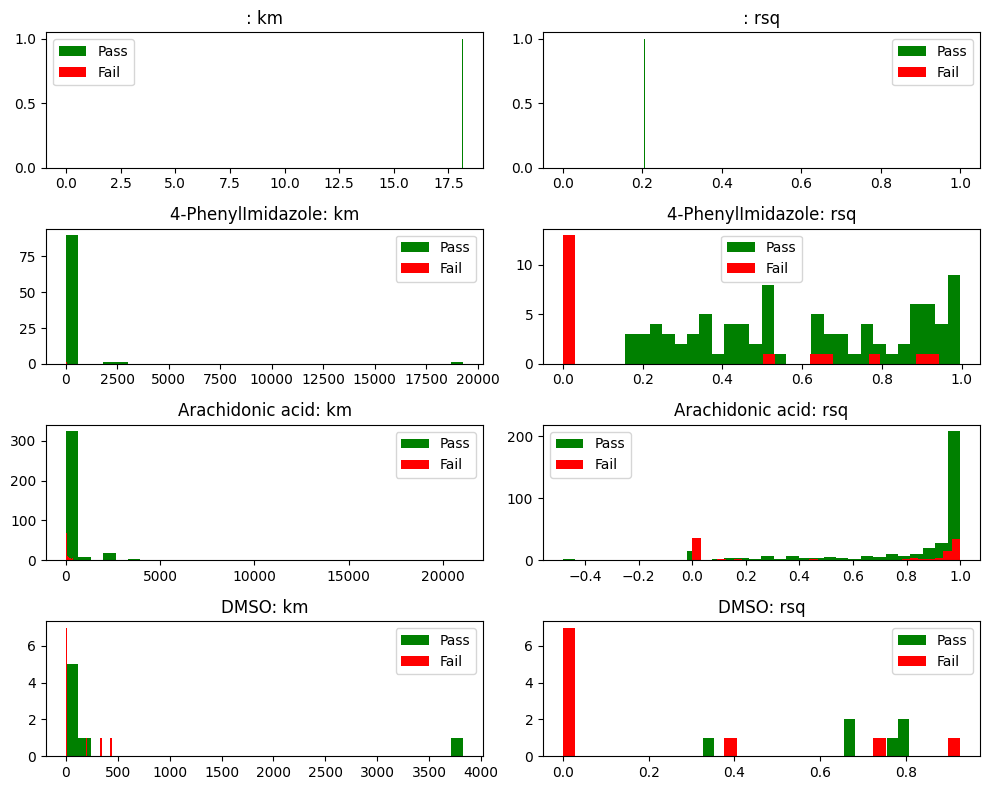

In [141]:
cols = ['km', 'rsq']

fig, axs = plt.subplots(nrows:=len(df['ligand'].unique()) // 2, 
                       len(cols), 
                       figsize=(10, 2 * nrows),
                       )

for (ligand, df_ligand), ax_row in zip(iter(df.groupby('ligand')),  axs):
    print(ligand)
    for col, ax in zip(cols, ax_row):
        ax.set_prop_cycle(color=['green', 'red'])
        for ok in [True, False]:
            ax.hist(df_ligand.loc[df_ligand['ok'] == ok, col],
                    bins=32,
                    label='Pass' if ok else 'Fail',
                   )
        ax.set_title(f'{ligand}: {col}')
        ax.legend()
        if col == 'km':
            # ax.set_xlim(0, 1000)
            pass

plt.tight_layout()
plt.show()

## I think I need to store $A_{410}$ or so

Which should help normalize $V_{max}$.

Normalized $V_{max}$ vs $R^2$ would be interesting

In [84]:
ax

<Axes: title={'center': 'Buffer Only: rsq'}>